In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel('saline_final_test.xlsx')
data.head(10)

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
0,30.648048,42.261090,24.836431,503.677883,0.000942,0
1,31.019030,42.782960,24.825085,503.673230,0.000941,0
2,32.918222,44.330141,25.642509,532.695245,0.000243,0
3,33.708846,45.065131,26.182776,551.631701,0.000239,0
4,34.940351,46.238222,27.049364,581.997313,0.000233,0
5,35.889947,47.121659,27.699846,604.631352,0.000132,0
6,36.998516,48.316187,28.456220,631.131177,-0.000660,0
7,37.948112,48.316337,29.106701,641.412495,-0.001402,0
8,38.906297,47.528913,30.947931,658.090365,0.009710,0
9,39.041981,47.381726,31.055984,654.376148,0.010500,0


In [13]:
data.shape

(370, 6)

In [14]:
data.describe()

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,43.030009,52.094492,31.967650,530.893491,0.047259,1.997297
std,9.924879,12.128538,2.750258,261.670821,0.041913,1.122566
min,28.138326,30.030097,22.613502,-9.384841,-0.002706,0.000000
25%,33.621468,43.634037,30.176835,434.320077,0.000806,1.000000
50%,43.466377,49.681394,32.546772,601.877319,0.040883,3.000000
75%,50.929474,62.560178,33.854797,764.526140,0.078343,3.000000
max,62.820060,70.876488,36.921123,847.031800,0.138698,3.000000


In [15]:
len(data[data['Irradiance']<0])

2

In [16]:
len(data[data['Hourly_Productivity']<0])

31

In [17]:
data = data[data['Irradiance']>=0]

In [18]:
data[data<0] = 0

In [19]:
data.shape

(368, 6)

In [20]:
len(data[data['Hourly_Productivity']<0])

0

In [21]:
data.shape

(368, 6)

In [22]:
data.describe()

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,43.078227,52.211389,31.989915,533.812990,0.047494,1.991848
std,9.930181,12.056855,2.741018,259.352212,0.041879,1.123171
min,28.138326,30.030097,22.613502,1.285918,0.000000,0.000000
25%,33.610863,43.739116,30.215247,438.745299,0.000768,1.000000
50%,43.531180,49.681394,32.574108,604.401911,0.041278,3.000000
75%,50.966114,62.611969,33.865284,764.593325,0.078442,3.000000
max,62.820060,70.876488,36.921123,847.031800,0.138698,3.000000


In [23]:
import scipy

In [24]:
from scipy.stats import skew
print(skew(data,axis=0, bias=True))

[ 0.16157839  0.09635726 -1.04416203 -0.77632553  0.38645746 -0.50390937]


In [25]:
from scipy.stats import kurtosis
print(kurtosis(data,axis=0, bias=True))

[-1.27333738 -1.05097232  1.70254084 -0.77671518 -0.95598859 -1.29296868]


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   T_water              368 non-null    float64
 1   T_inside_glass       368 non-null    float64
 2   Ambient_Temperature  368 non-null    float64
 3   Irradiance           368 non-null    float64
 4   Hourly_Productivity  368 non-null    float64
 5   Mirror               368 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.1 KB


In [27]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]
print(len(features_with_na))

0


                      T_water  T_inside_glass  Ambient_Temperature  \
T_water              1.000000        0.834065             0.671587   
T_inside_glass       0.834065        1.000000             0.696288   
Ambient_Temperature  0.671587        0.696288             1.000000   
Irradiance           0.476190        0.811463             0.592725   
Hourly_Productivity  0.924453        0.642862             0.507940   
Mirror               0.401817        0.454503             0.246296   

                     Irradiance  Hourly_Productivity    Mirror  
T_water                0.476190             0.924453  0.401817  
T_inside_glass         0.811463             0.642862  0.454503  
Ambient_Temperature    0.592725             0.507940  0.246296  
Irradiance             1.000000             0.187925  0.123974  
Hourly_Productivity    0.187925             1.000000  0.443255  
Mirror                 0.123974             0.443255  1.000000  


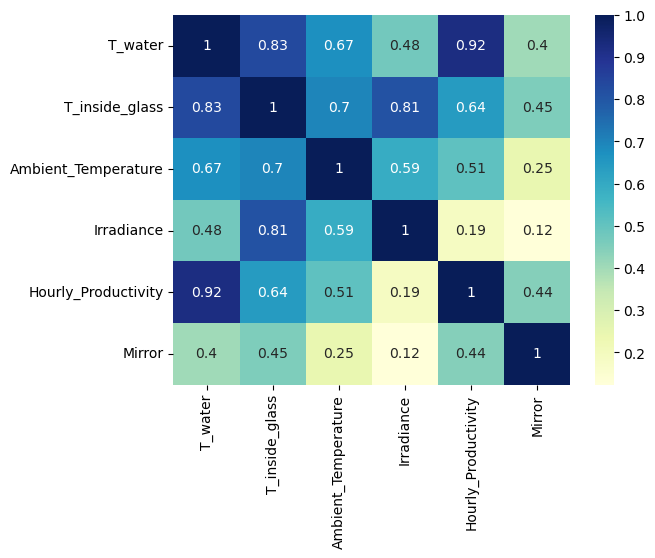

In [28]:
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 800x640 with 0 Axes>

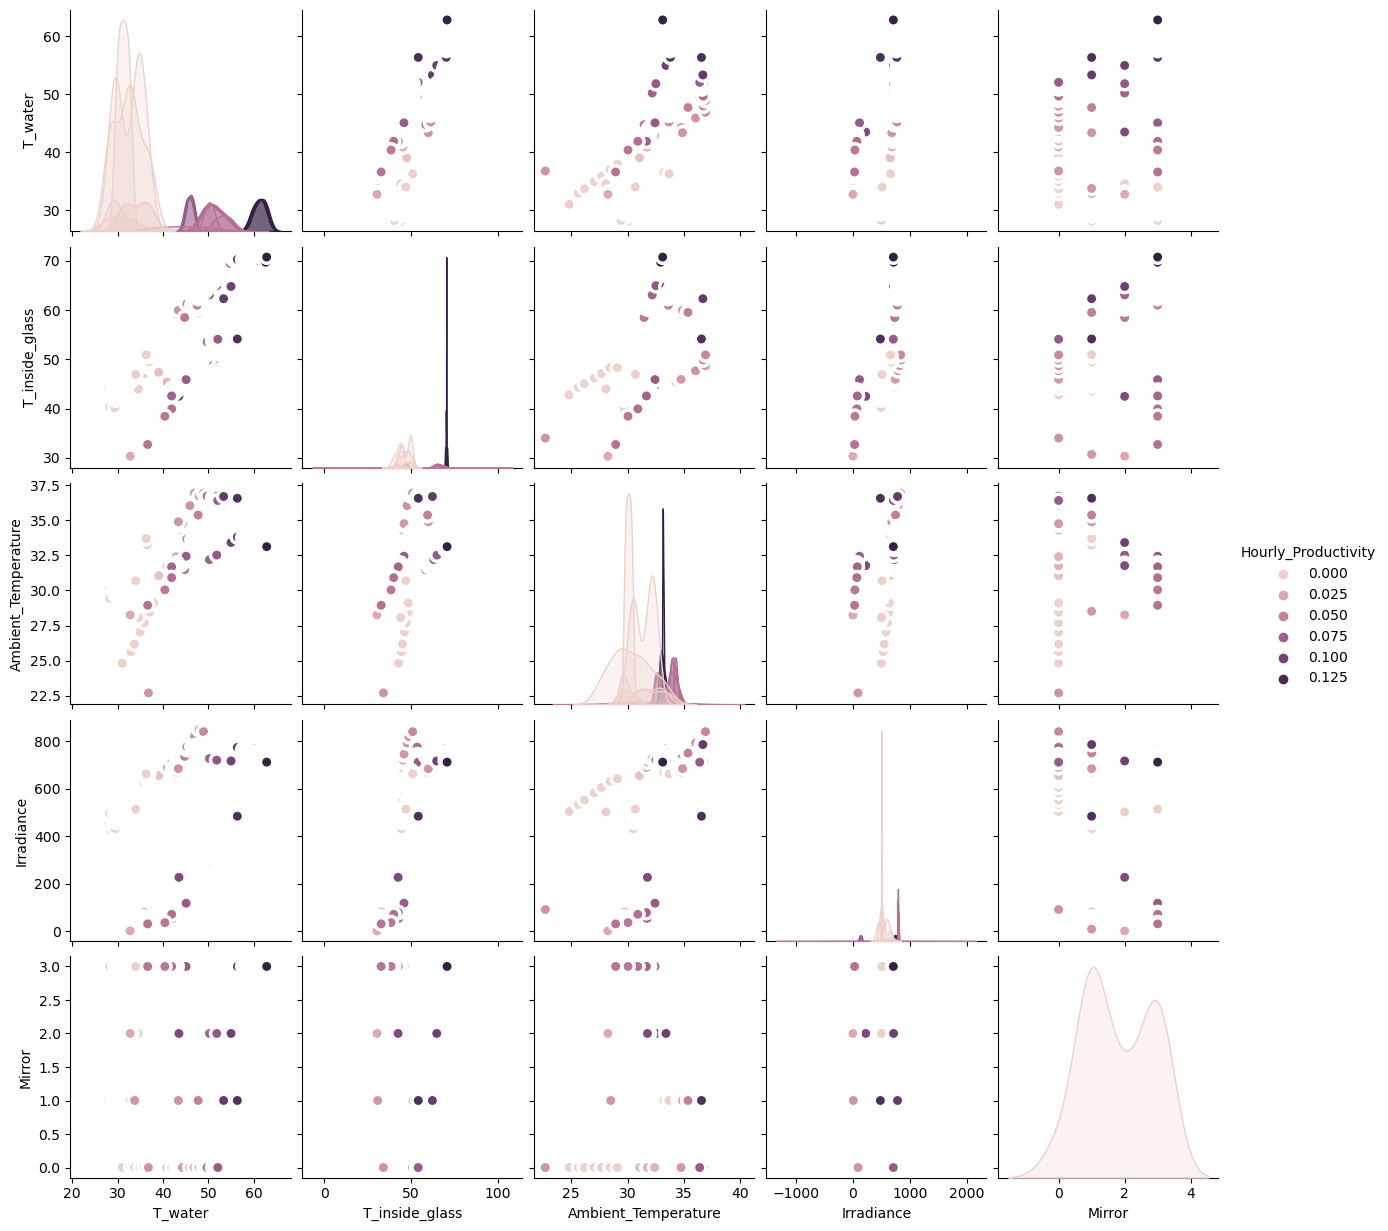

In [29]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="Hourly_Productivity", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [30]:
from scipy.stats import variation
variation(data)

array([0.23020168, 0.23060988, 0.08556731, 0.48518788, 0.88058501,
       0.56311742])

### Linear Regression

In [31]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [32]:
import sys
sys.path.append('C:/Users/91905/AppData/Local/Programs/Python/Python311/Lib/site-packages')

In [33]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
model.coef_

array([ 4.68557275e-03, -2.65633054e-04, -8.62265719e-04, -4.12856565e-05,
        2.95018006e-03])

In [37]:
model.intercept_

-0.09690502329001688

In [38]:
y_pred_train = model.predict(X_train)

In [39]:
y_pred_test=model.predict(X_test)

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error testing: 0.007397251749511455
Mean Squared Error testing: 8.269485807390359e-05
Root Mean Squared Error testing: 0.009093671319874257


In [42]:
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error training: 0.00847507756482186
Mean Squared Error training: 0.00011148962278459556
Root Mean Squared Error training: 0.010558864654147035


In [43]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))

print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

R2 score training:  0.9538169058738063
R2 score testing:  0.9355940167371576


In [44]:
Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

Adjusted R2 score training :  0.9343110290227583
Adjusted R2 score testing :  0.9516177109154161


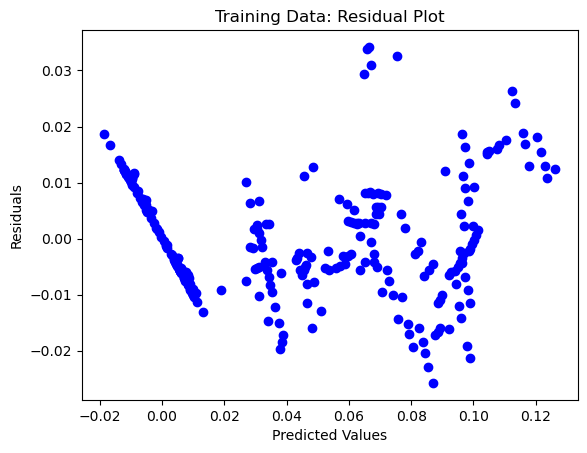

In [45]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

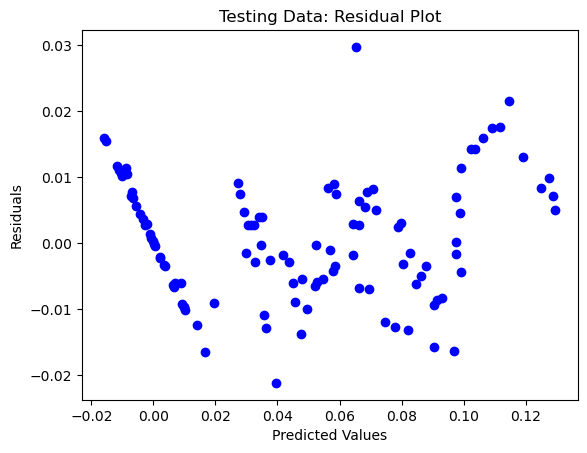

In [46]:
# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

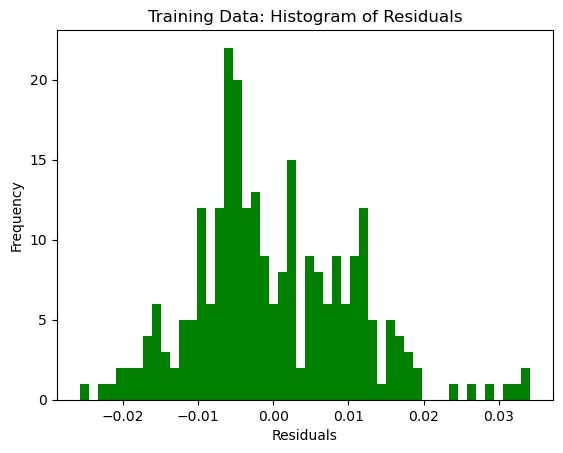

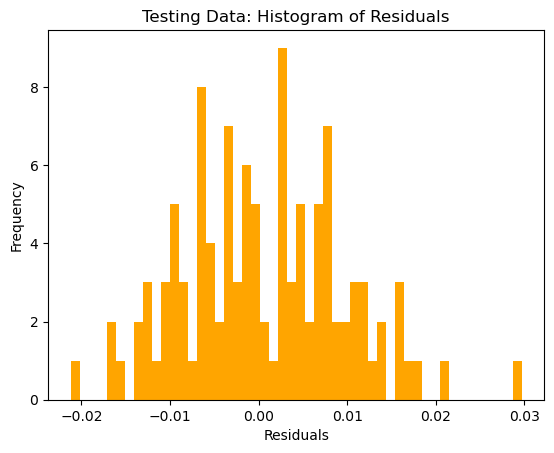

In [47]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

In [48]:
import scipy

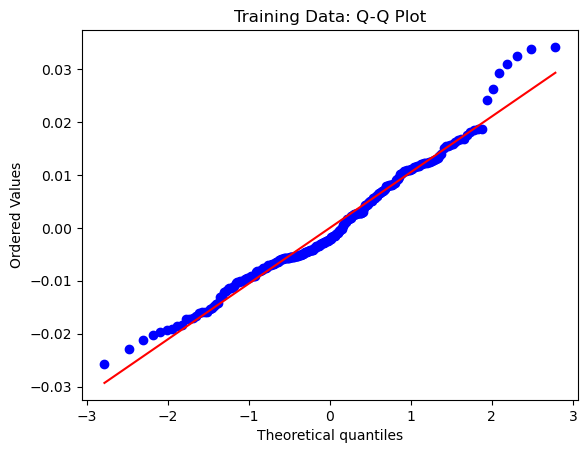

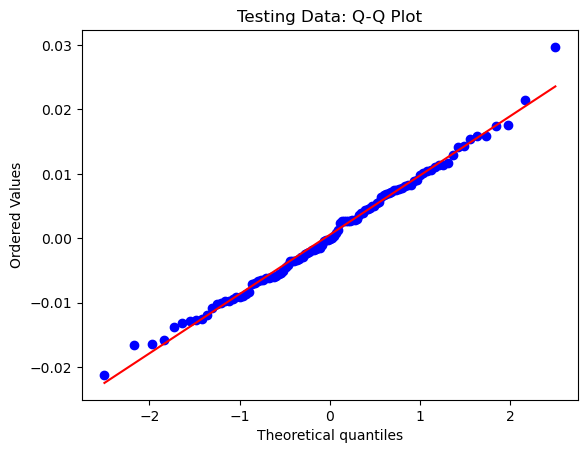

In [49]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

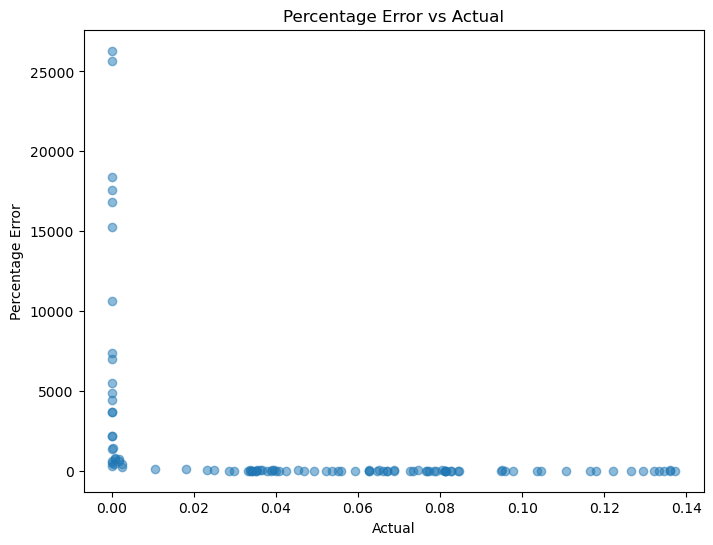

In [50]:
#percentage error graph
# calculate percentage error for testing data
percentage_error = 100 * np.abs(y_test - y_pred_test) / y_test

# plot percentage error
plt.figure(figsize=(8, 6))
plt.scatter(y_test, percentage_error, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs Actual')
plt.show()

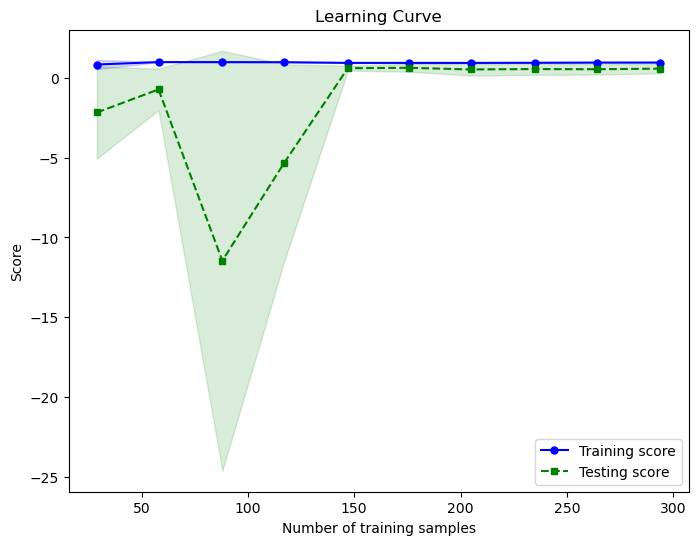

In [51]:
# # Learning curve
from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


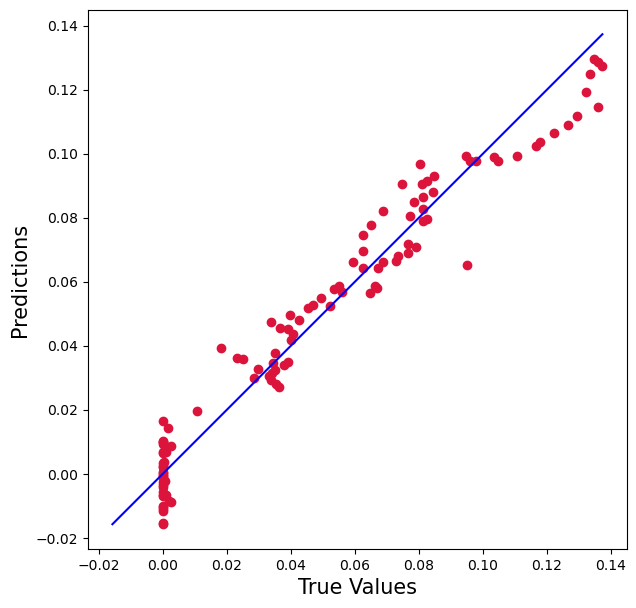

In [52]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


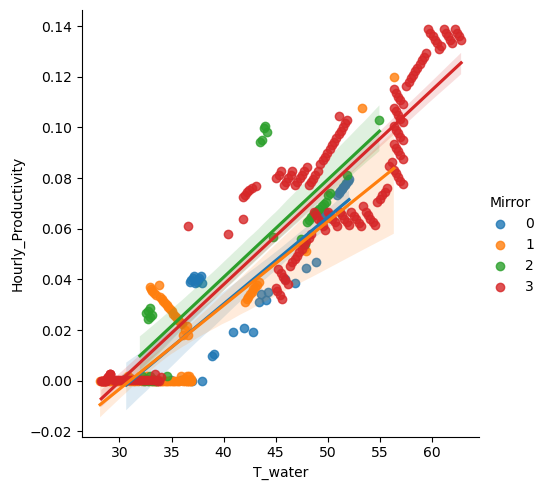

In [53]:
import seaborn as sns
g = sns.lmplot(x='T_water', y='Hourly_Productivity',data = data,hue='Mirror')

### Decision Tree Regression

In [54]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="friedman_mse",
                           max_depth=10,
                            min_samples_split=5,
                           random_state=5)

In [57]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=5, random_state=5)

In [58]:
y_pred_test = reg.predict(X_test)

In [59]:
y_pred_train = reg.predict(X_train)

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_test)

6.356277072600657e-05

In [61]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error testing: 0.003348098139354751
Mean Squared Error testing: 6.356277072600657e-05
Root Mean Squared Error testing: 0.007972626338039841


In [62]:
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error training: 0.0010579337607893088
Mean Squared Error training: 4.459395915128936e-06
Root Mean Squared Error training: 0.002111728182112683


In [63]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.96450171761904
R2 score testing:  0.9974238698499582
Adjusted R2 score training :  0.9973725525162921
Adjusted R2 score testing :  0.9628113232199467


In [64]:
from sklearn import tree
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_0 <= 42.24
|   |--- feature_1 <= 40.06
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_3 <= 83.51
|   |   |   |   |--- feature_2 <= 29.60
|   |   |   |   |   |--- feature_2 <= 28.47
|   |   |   |   |   |   |--- feature_3 <= 9.51
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- feature_3 >  9.51
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |--- feature_2 >  28.47
|   |   |   |   |   |   |--- feature_0 <= 34.14
|   |   |   |   |   |   |   |--- feature_2 <= 28.74
|   |   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |   |--- feature_2 >  28.74
|   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- feature_0 >  34.14
|   |   |   |   |   |   |   |--- feature_1 <= 31.86
|   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |   |--- feature_1 >  31.86
|   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |--- feature_2 >  29.60
|   |   |   |   |

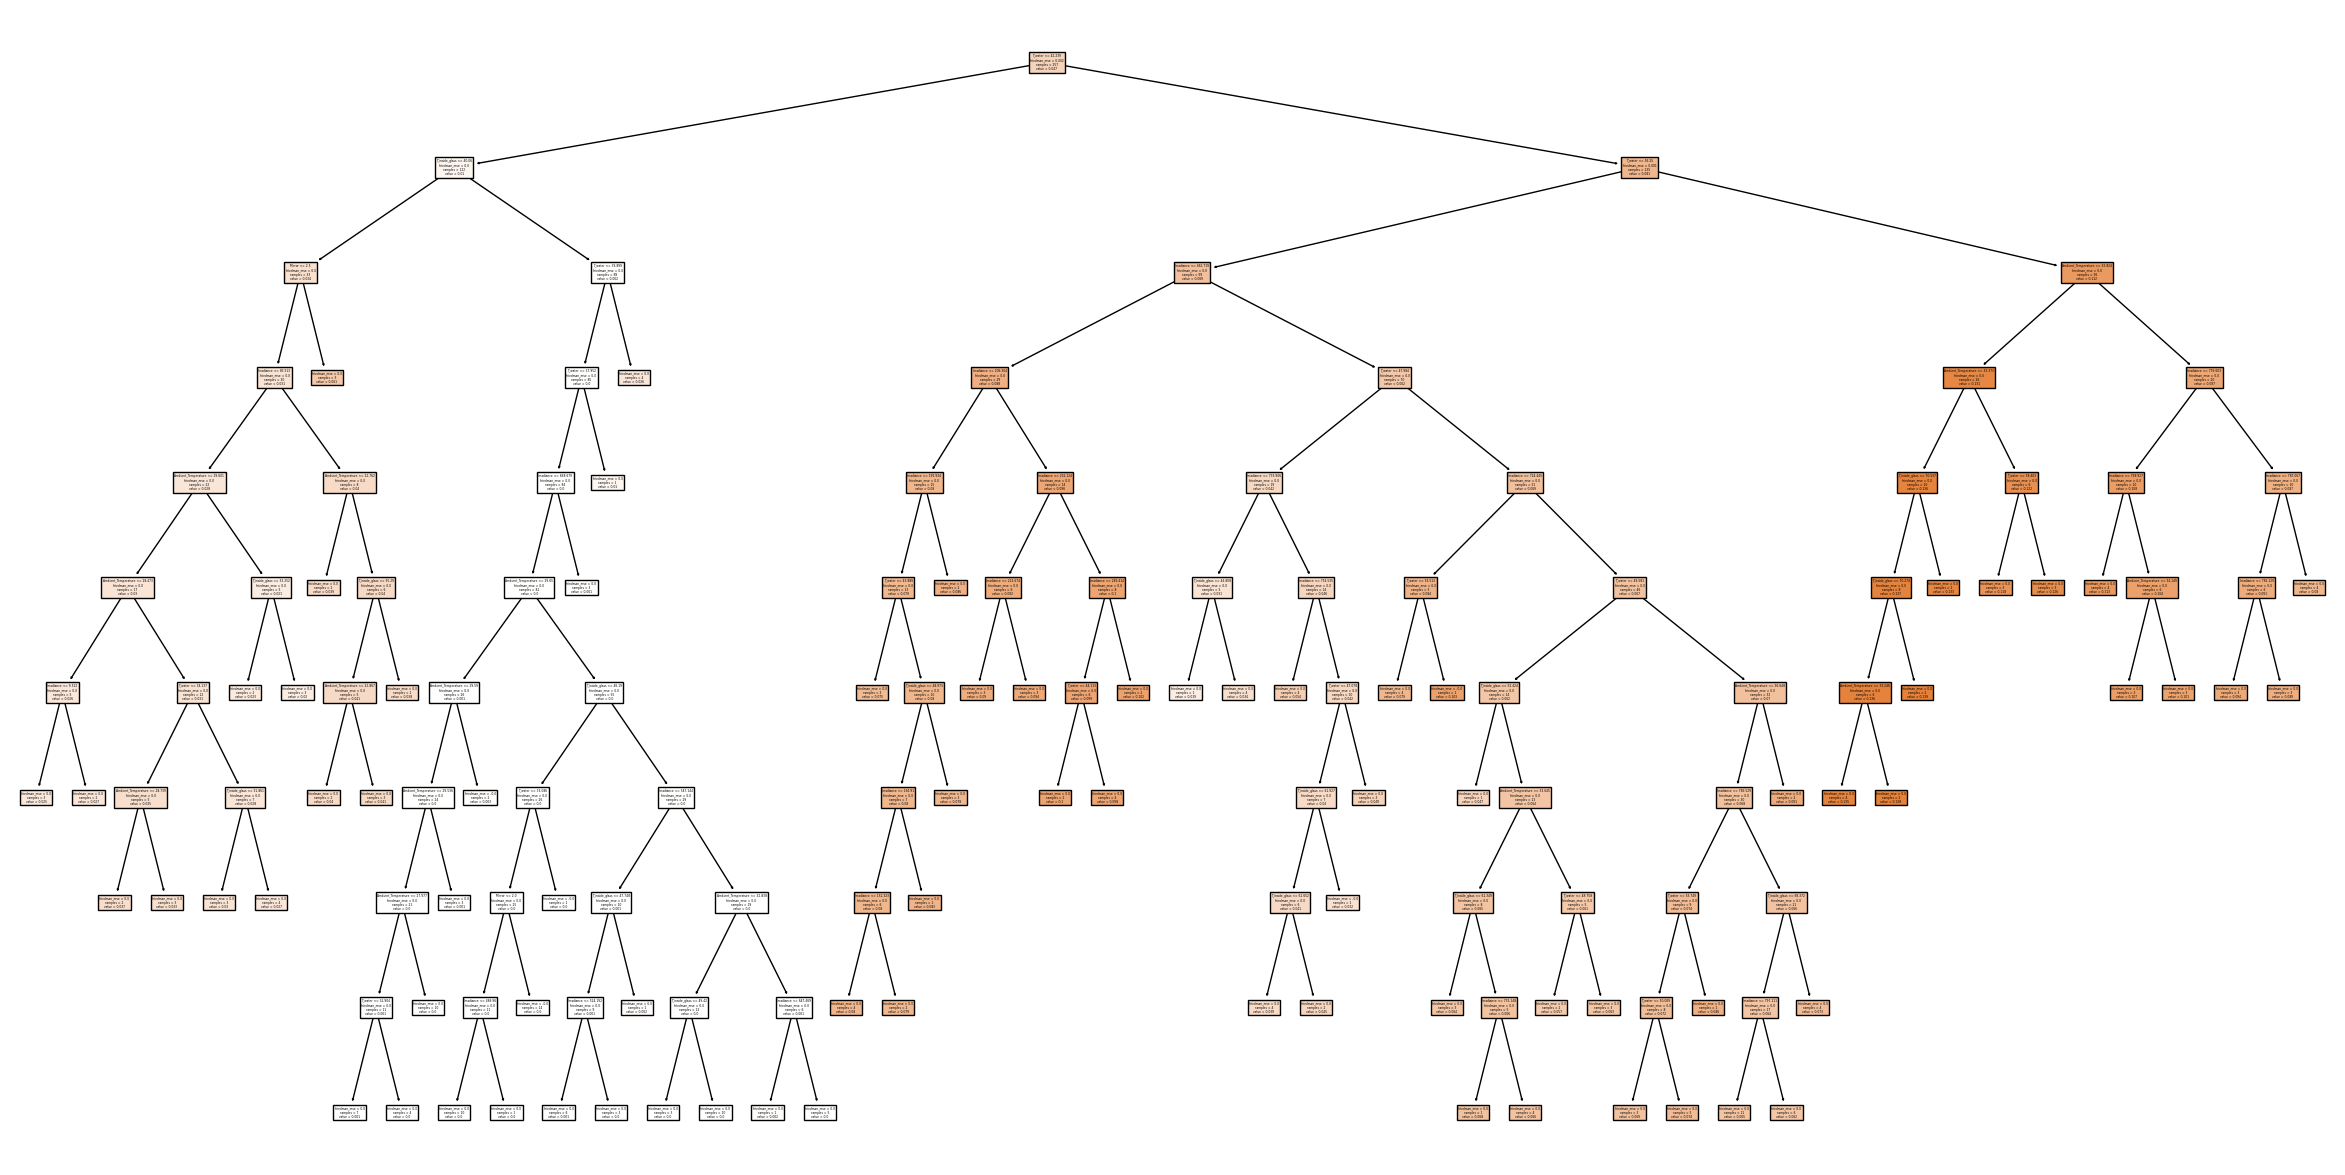

In [65]:
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(reg, feature_names=X.columns, filled=True)

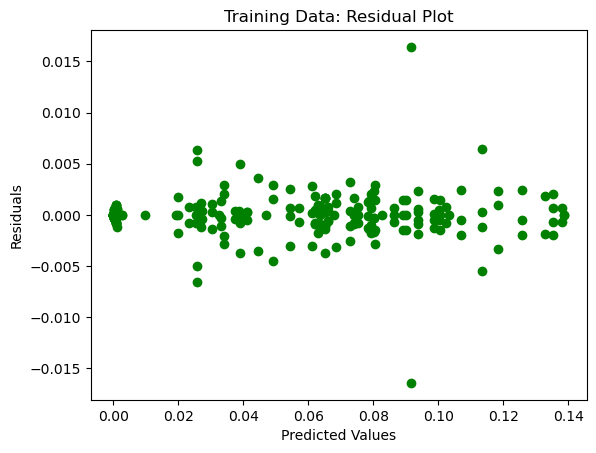

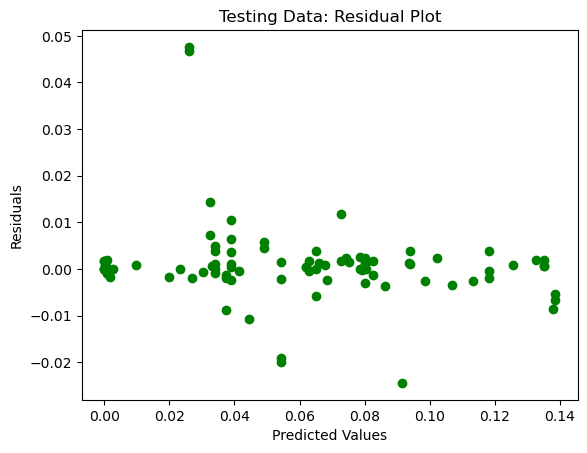

In [66]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

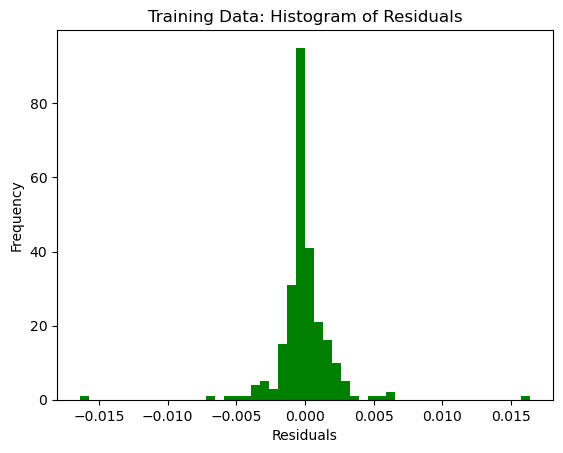

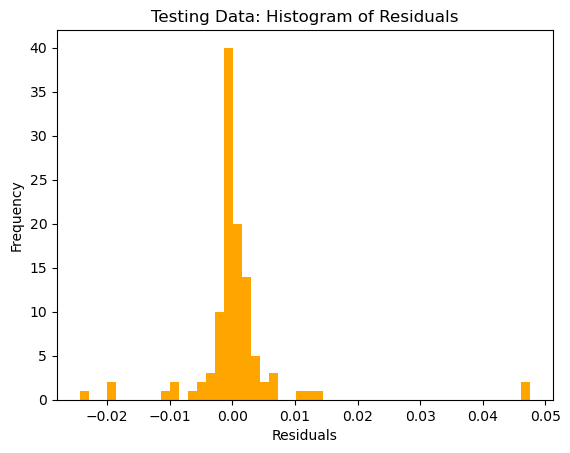

In [67]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

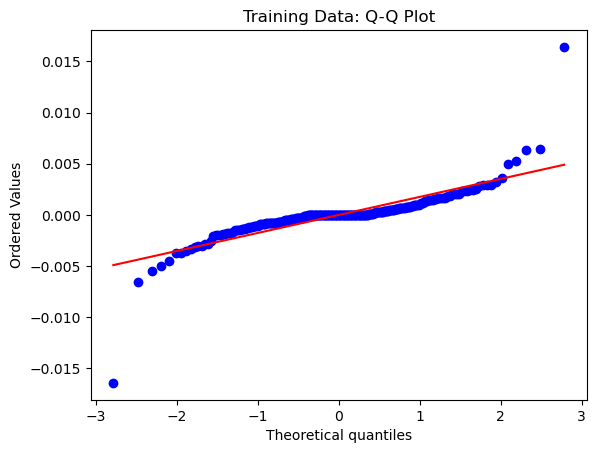

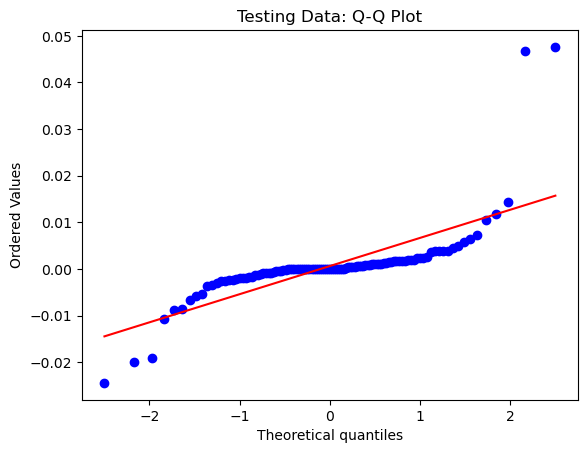

In [68]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

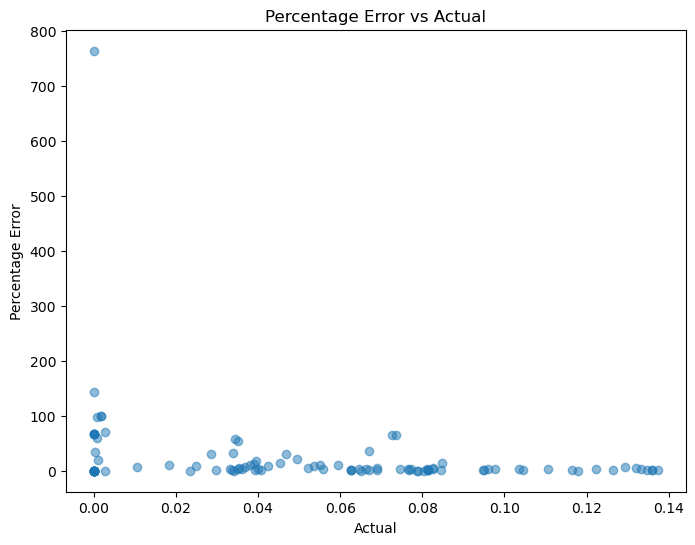

In [69]:
#percentage error graph
# calculate percentage error for testing data
percentage_error = 100 * np.abs(y_test - y_pred_test) / y_test

# plot percentage error
plt.figure(figsize=(8, 6))
plt.scatter(y_test, percentage_error, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs Actual')
plt.show()

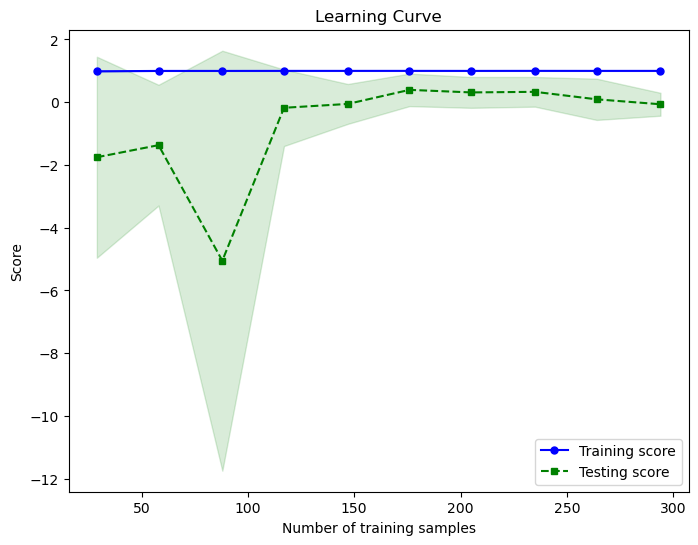

In [70]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=reg, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


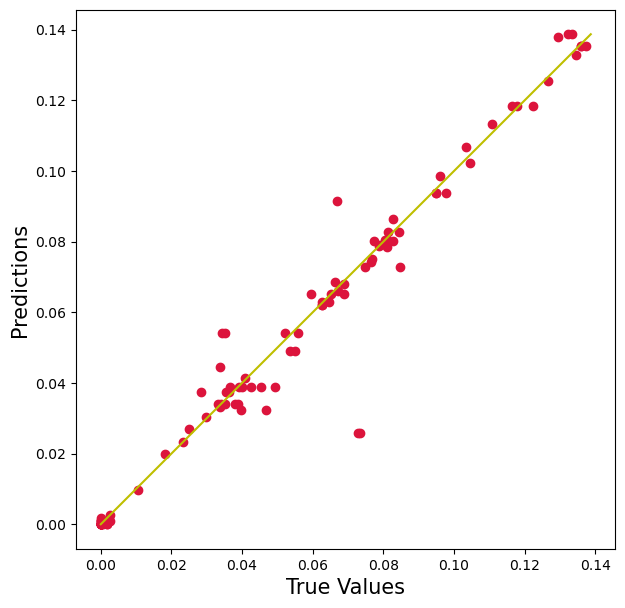

In [71]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'y-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [73]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1000,
                      random_state=42)

In [76]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [77]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred_test)

1.1963654540472492e-05

In [78]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.0018949449829929513
Mean Squared Error testing: 1.1963654540472492e-05
Root Mean Squared Error testing: 0.003458851621632893


Mean Absolute Error training: 0.001017562814059094
Mean Squared Error training: 4.7926399838834015e-06
Root Mean Squared Error training: 0.0021892098994576565


In [79]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9933185859846071
R2 score testing:  0.9972313594496306
Adjusted R2 score training :  0.9971762072474321
Adjusted R2 score testing :  0.9930004234124455


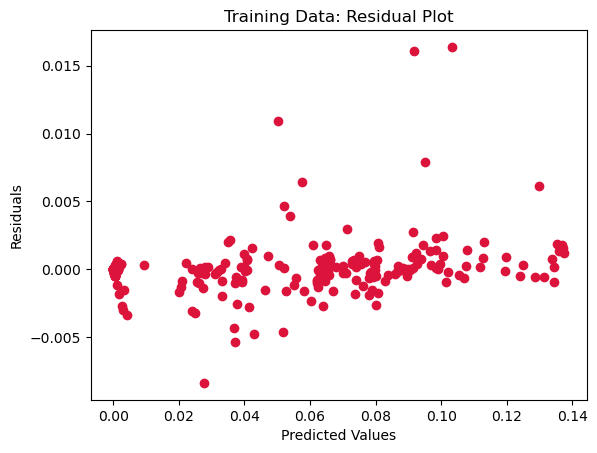

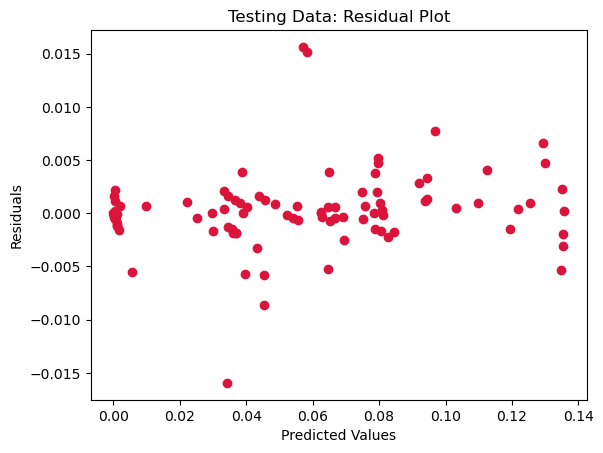

In [80]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='crimson')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='crimson')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

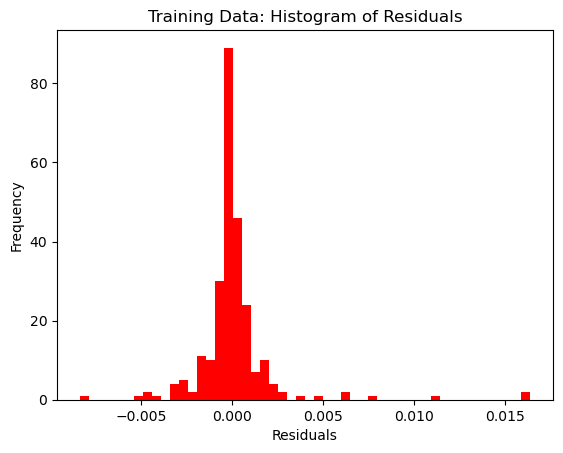

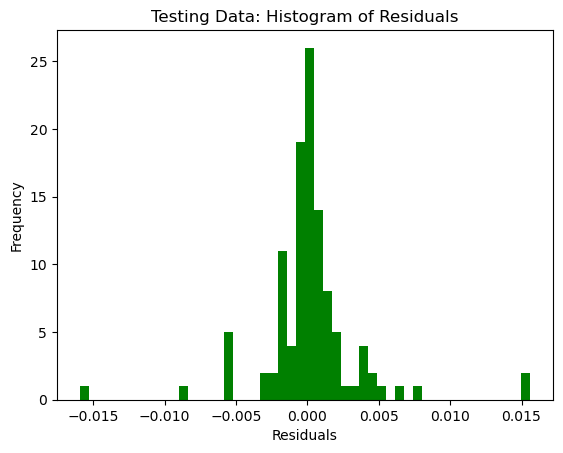

In [81]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='red')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

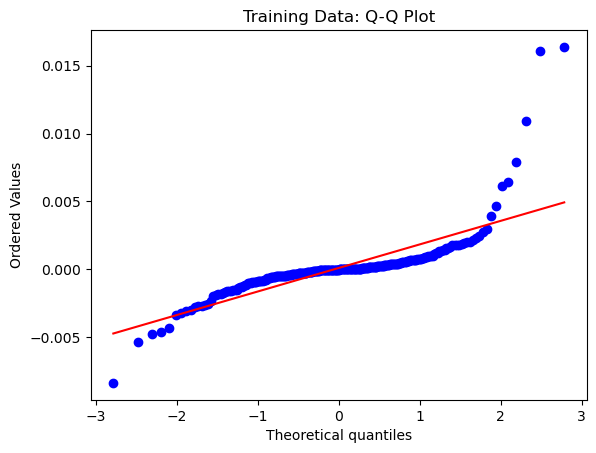

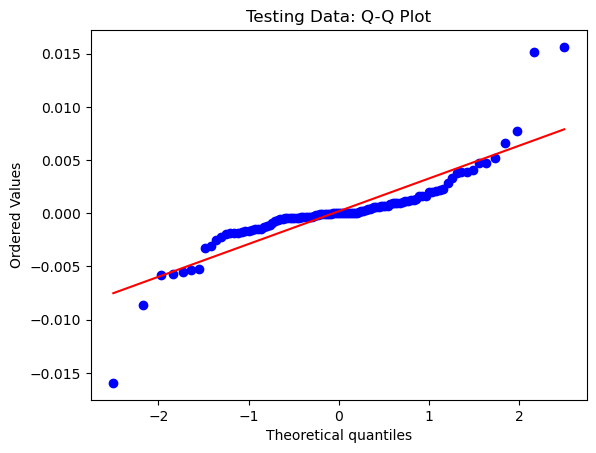

In [82]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

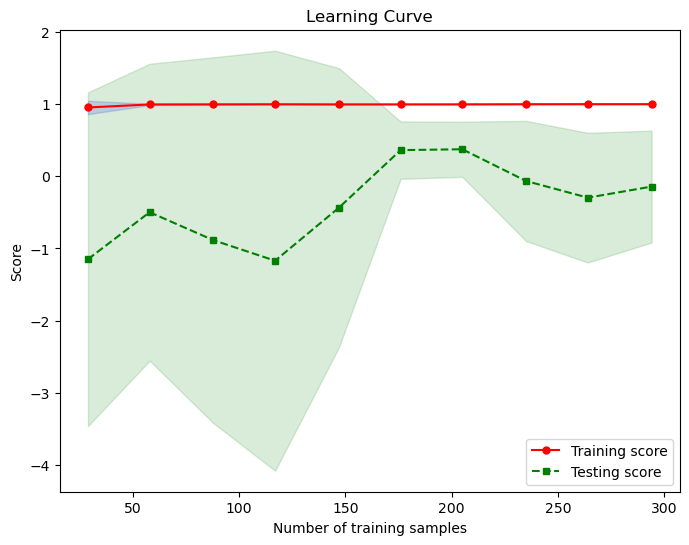

In [83]:
# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


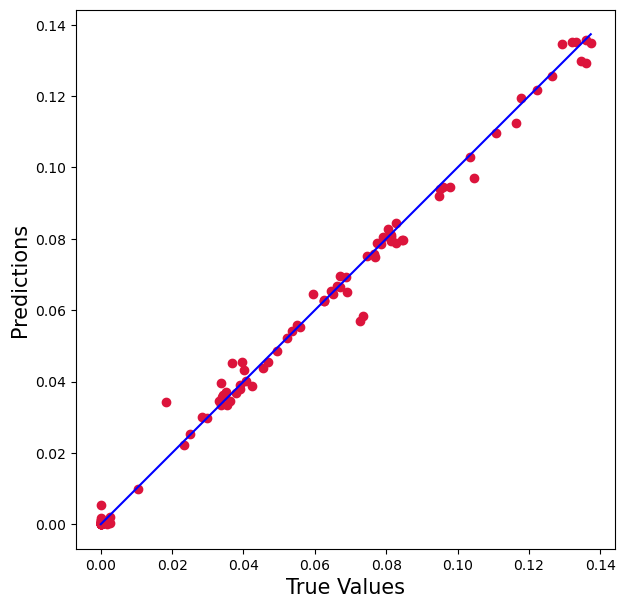

In [84]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
data

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
0,30.648048,42.261090,24.836431,503.677883,0.000942,0
1,31.019030,42.782960,24.825085,503.673230,0.000941,0
2,32.918222,44.330141,25.642509,532.695245,0.000243,0
3,33.708846,45.065131,26.182776,551.631701,0.000239,0
4,34.940351,46.238222,27.049364,581.997313,0.000233,0
...,...,...,...,...,...,...
363,42.063907,42.800097,31.734176,54.004777,0.073506,3
364,41.882302,42.562341,31.681390,78.314768,0.072720,3
365,41.891860,39.947029,30.913158,70.969142,0.063867,3
366,40.388037,38.439829,30.041238,36.133406,0.057933,3


In [87]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
gb = GradientBoostingRegressor(random_state=42)

In [90]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [91]:
import pickle
pickle.dump(gb, open('./model.sav', 'wb'))

In [92]:
y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

In [93]:
from sklearn import metrics
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.002193743178187174
Mean Squared Error testing: 1.340901677343957e-05
Root Mean Squared Error testing: 0.003661832433828666


Mean Absolute Error training: 0.0010848804170948319
Mean Squared Error training: 2.3693013509658356e-06
Root Mean Squared Error training: 0.0015392535044513739


In [94]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.992511385856252
R2 score testing:  0.9986312880127888
Adjusted R2 score training :  0.9986040228337607
Adjusted R2 score testing :  0.9921547851827401


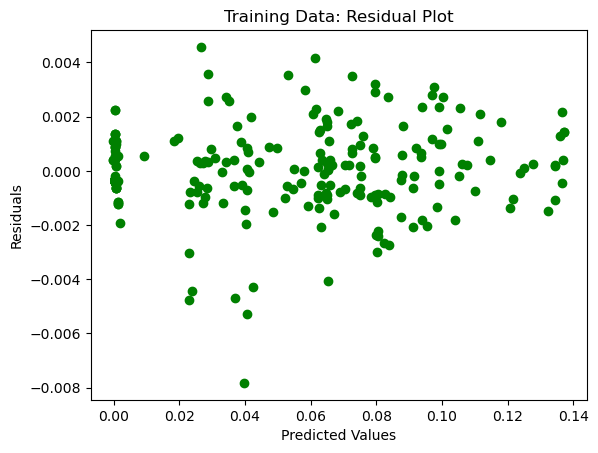

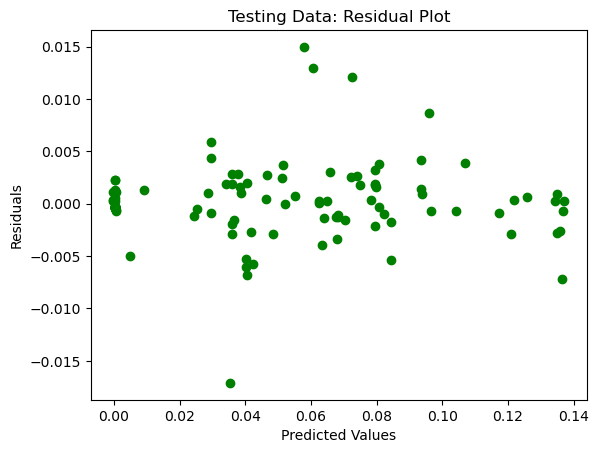

In [95]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

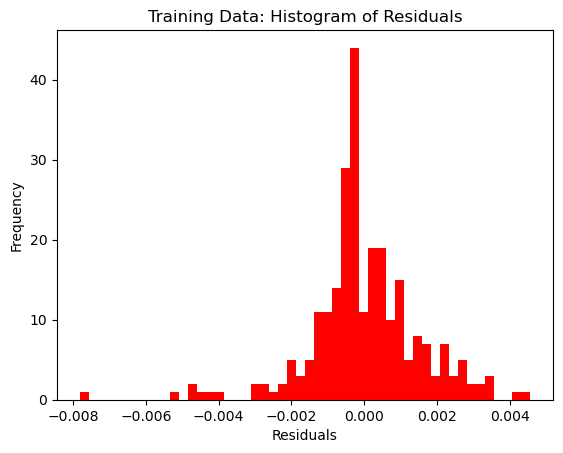

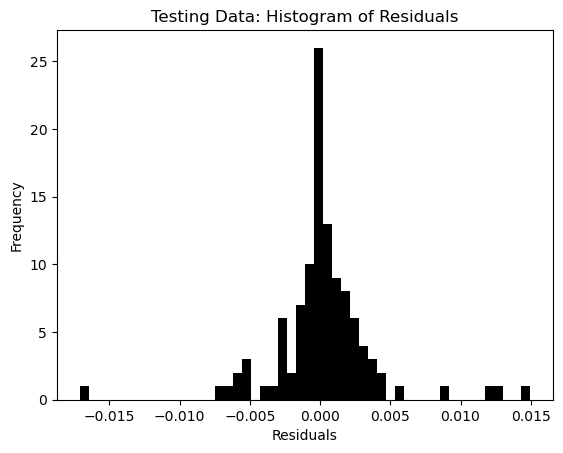

In [96]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='red')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

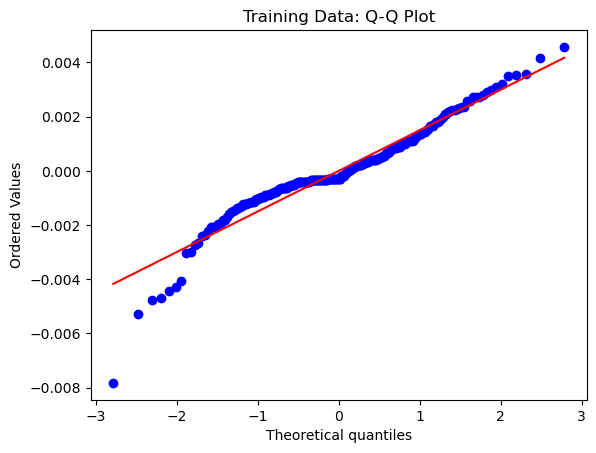

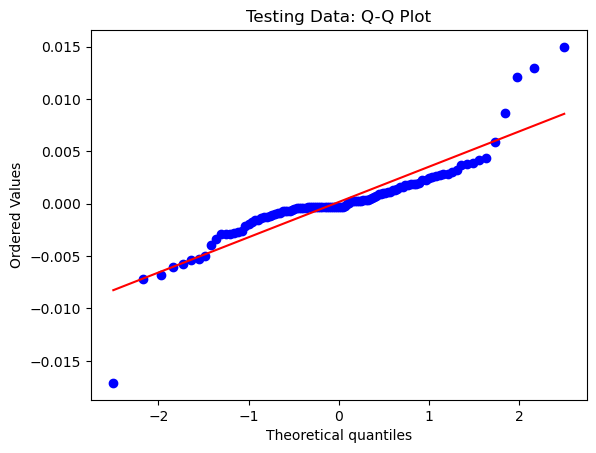

In [97]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

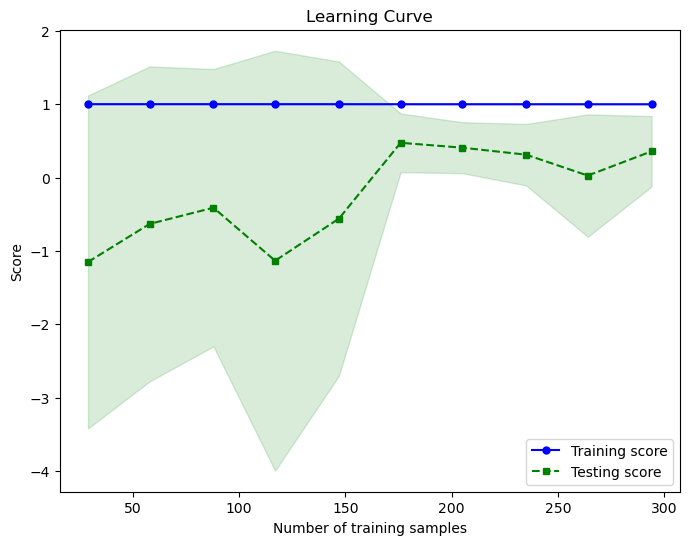

In [98]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


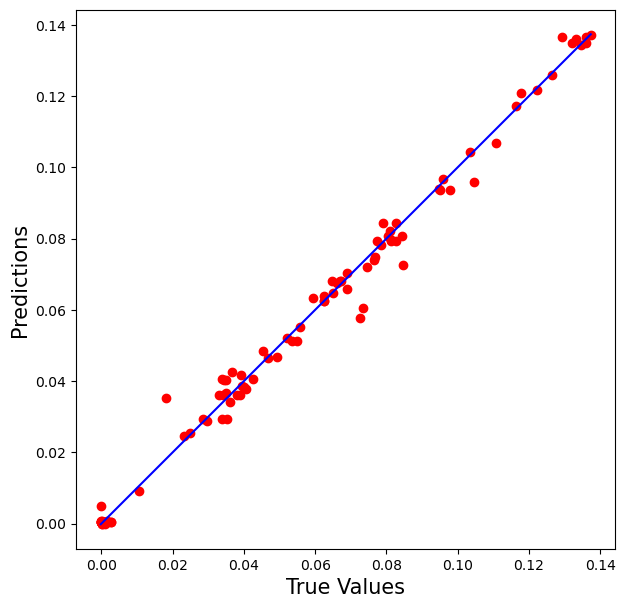

In [99]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='red')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Support Vector Regression

In [100]:
scaled_data = (data - data.min()) / (data.max() - data.min())

In [101]:
scaled_data.head()

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
0,0.072364,0.299439,0.155367,0.594022,0.006792,0.0
1,0.083061,0.312215,0.154574,0.594017,0.006786,0.0
2,0.137822,0.350093,0.211706,0.628332,0.001755,0.0
3,0.160618,0.368087,0.249467,0.650722,0.001726,0.0
4,0.196127,0.396807,0.310035,0.686626,0.001678,0.0


In [102]:
X = scaled_data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = scaled_data['Hourly_Productivity']

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
from sklearn import svm

In [105]:
svr = svm.SVR()

In [106]:
svr.fit(X_train,y_train)

SVR()

In [107]:
y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)

In [108]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.05586266652313816
Mean Squared Error testing: 0.0038634338331275902
Root Mean Squared Error testing: 0.0621565268747184


Mean Absolute Error training: 0.06341440322271716
Mean Squared Error training: 0.004892082625291774
Root Mean Squared Error training: 0.0699434244607152


In [109]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9584930755456715
R2 score testing:  0.9456339089260063
Adjusted R2 score training :  0.9445509190639746
Adjusted R2 score testing :  0.9565165553335606


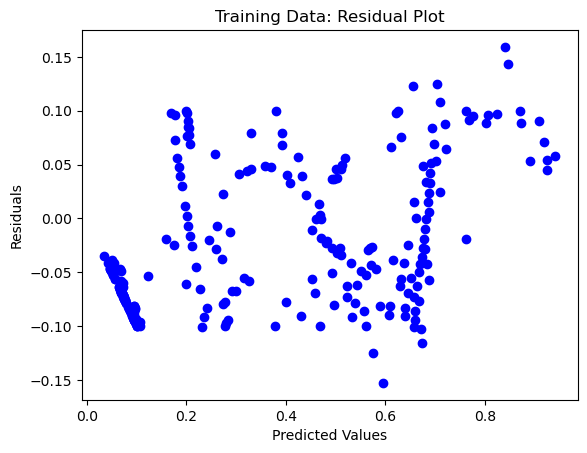

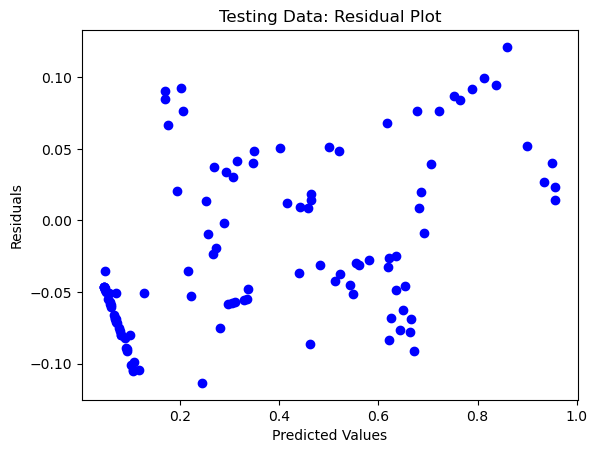

In [110]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

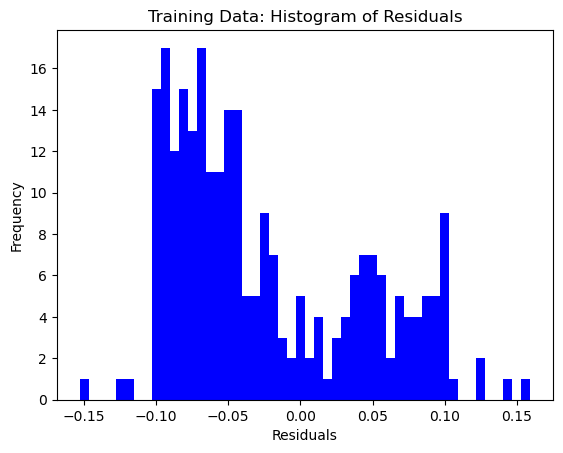

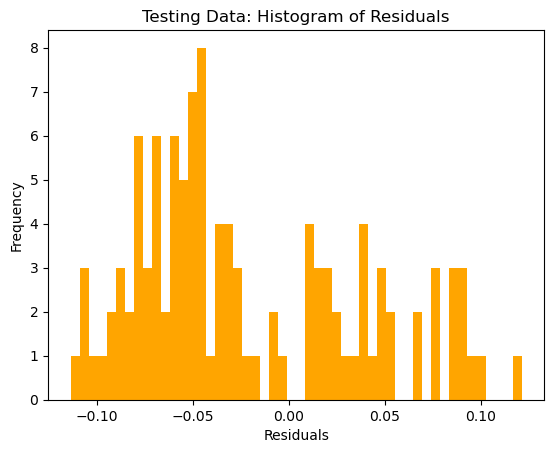

In [111]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

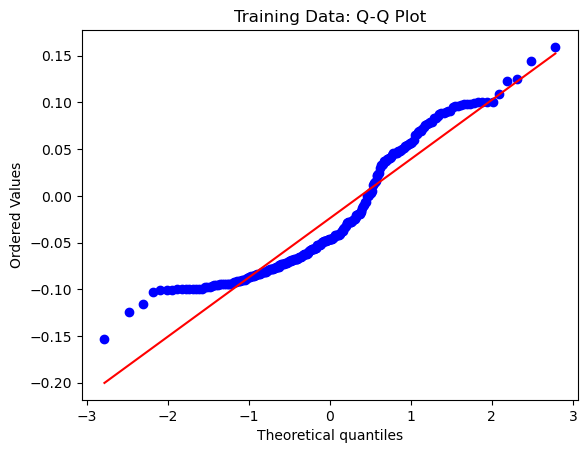

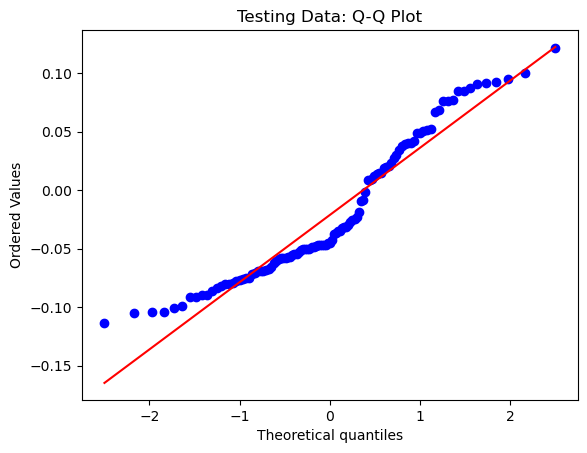

In [112]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

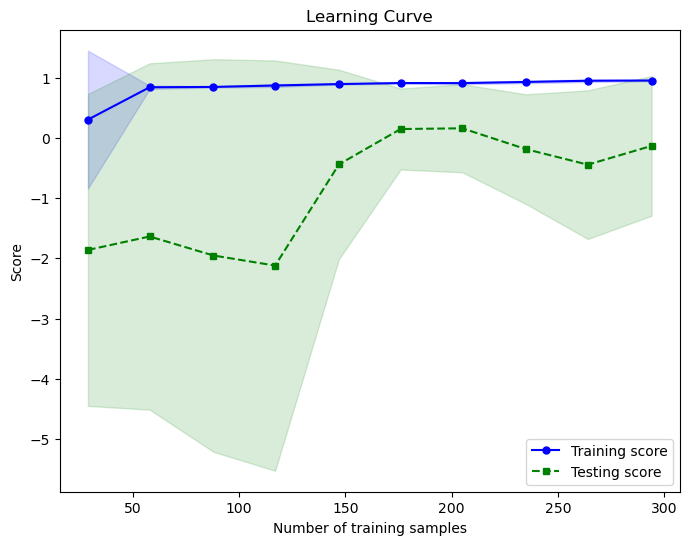

In [113]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svr, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


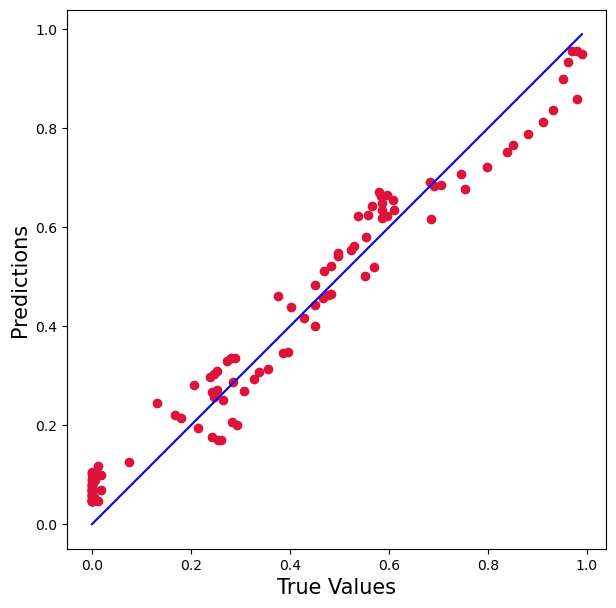

In [114]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


## ANN

In [115]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
!pip install keras
!pip install tensorflow
from keras import Sequential
from keras.layers import Dense

In [120]:
model = Sequential()
model.add(Dense(128, input_dim=5, activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear"))

In [121]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 92ms/step - loss: 0.0264 - mae: 0.1234 - val_loss: 0.0145 - val_mae: 0.1027
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0059 - mae: 0.0596 - val_loss: 0.0058 - val_mae: 0.0620
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0039 - mae: 0.0502 - val_loss: 0.0015 - val_mae: 0.0318
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0016 - mae: 0.0345 - val_loss: 0.0014 - val_mae: 0.0306
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 6.7838e-04 - val_mae: 0.0203
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 4.9966e-04 - mae: 0.0176 - val_loss: 3.8728e-04 - val_mae: 0.0166
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 3.5480e-04 - mae: 0.0144 - val_loss: 2.3424e-04 - val_mae: 0.0130
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss

7/7 [==============================] - 0s 17ms/step - loss: 1.8008e-05 - mae: 0.0031 - val_loss: 2.6215e-05 - val_mae: 0.0036
Epoch 61/100
7/7 [==============================] - 0s 16ms/step - loss: 2.0251e-05 - mae: 0.0031 - val_loss: 2.6863e-05 - val_mae: 0.0039
Epoch 62/100
7/7 [==============================] - 0s 17ms/step - loss: 1.8849e-05 - mae: 0.0031 - val_loss: 2.6250e-05 - val_mae: 0.0038
Epoch 63/100
7/7 [==============================] - 0s 18ms/step - loss: 1.8559e-05 - mae: 0.0032 - val_loss: 2.2561e-05 - val_mae: 0.0031
Epoch 64/100
7/7 [==============================] - 0s 16ms/step - loss: 1.7329e-05 - mae: 0.0029 - val_loss: 4.3138e-05 - val_mae: 0.0047
Epoch 65/100
7/7 [==============================] - 0s 16ms/step - loss: 1.8401e-05 - mae: 0.0029 - val_loss: 2.6755e-05 - val_mae: 0.0035
Epoch 66/100
7/7 [==============================] - 0s 16ms/step - loss: 1.4113e-05 - mae: 0.0026 - val_loss: 2.3459e-05 - val_mae: 0.0035
Epoch 67/100
7/7 [======================

In [123]:
y_pred_test = model.predict(X_test_scaled)

y_pred_train = model.predict(X_train_scaled)

9/9 [==============================] - 0s 3ms/step


In [124]:
from sklearn import metrics
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.0026491415328770717
Mean Squared Error testing: 1.1509301940056375e-05
Root Mean Squared Error testing: 0.0033925362105740853


Mean Absolute Error training: 0.0026443764012419914
Mean Squared Error training: 1.3872800938387436e-05
Root Mean Squared Error training: 0.0037246209120375506


In [125]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9935723310106007
R2 score testing:  0.9919858784815085
Adjusted R2 score training :  0.9918262346265585
Adjusted R2 score testing :  0.993266251534915


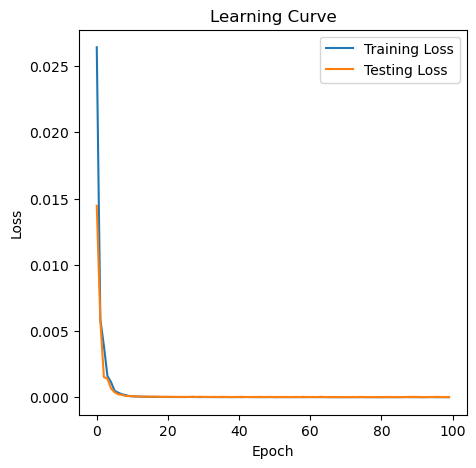

In [126]:
# Generate the six plots
fig, axes = plt.subplots(figsize=(5,5))

# Plot the learning curve
axes.plot(history.history['loss'], label='Training Loss')
axes.plot(history.history['val_loss'], label='Testing Loss')
axes.set_title('Learning Curve')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

C:\Users\divya\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


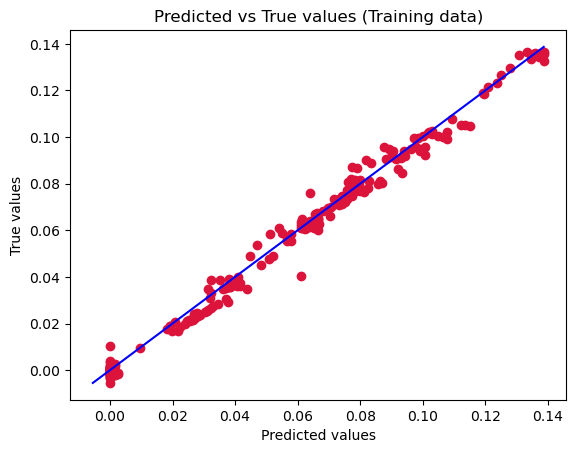

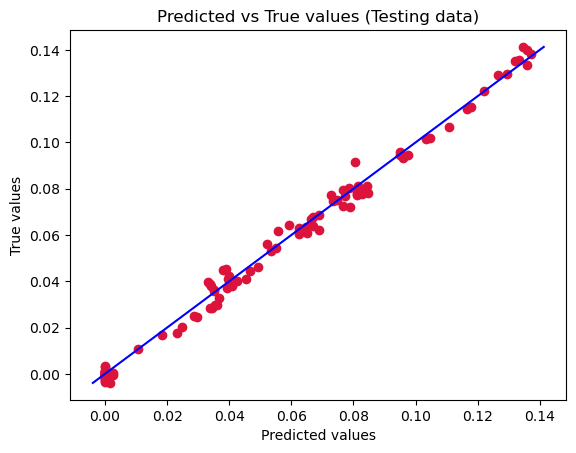

In [127]:
# Plot the predicted vs true values for the training data
plt.scatter(y_train, y_pred_train, c='crimson')
p1 = min(min(y_pred_train),min(y_train))
p2 = max(max(y_pred_train),max(y_train))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Predicted vs True values (Training data)')
plt.show()

# Plot the predicted vs true values for the testing data
plt.scatter(y_test, y_pred_test,c='crimson')
p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Predicted vs True values (Testing data)')
plt.show()

In [128]:
y_pred_train = y_pred_train.reshape(-1)
y_pred_test = y_pred_test.reshape(-1)

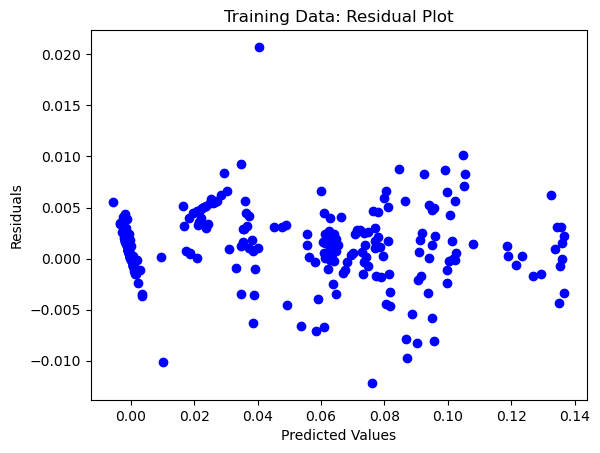

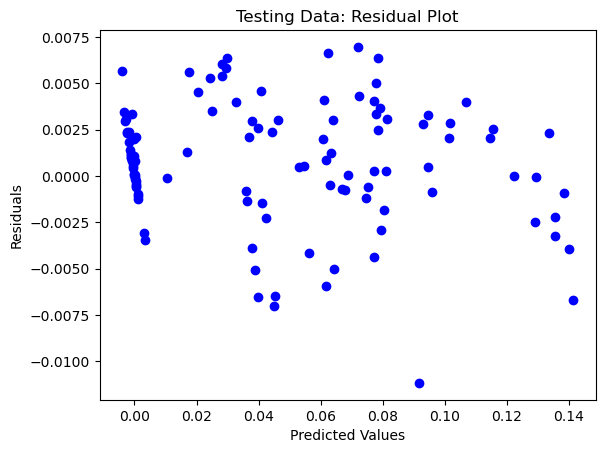

In [129]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

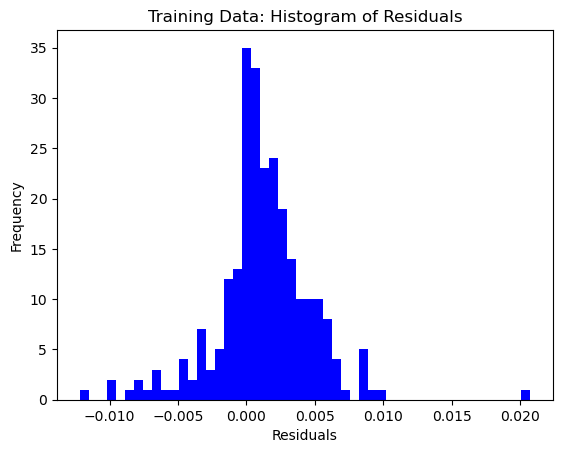

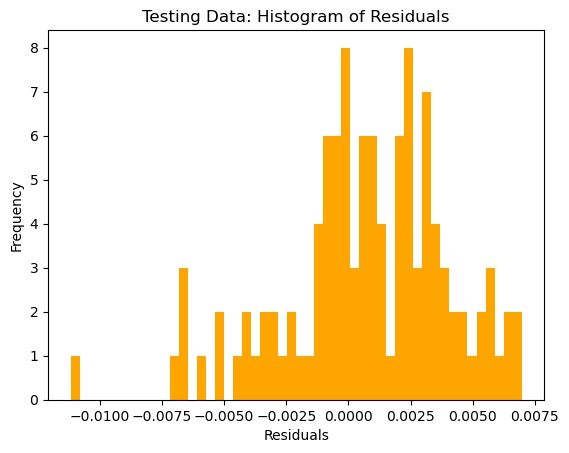

In [130]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

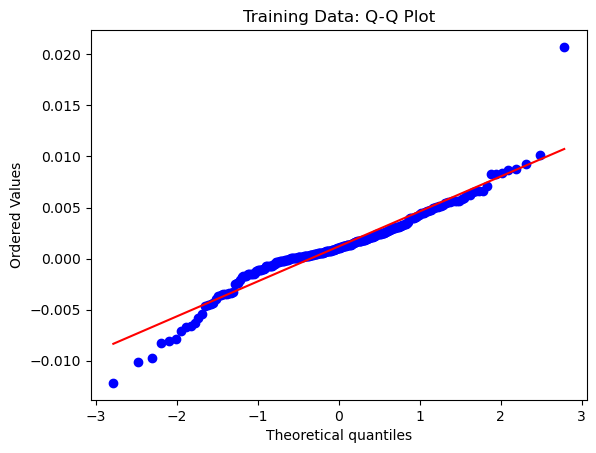

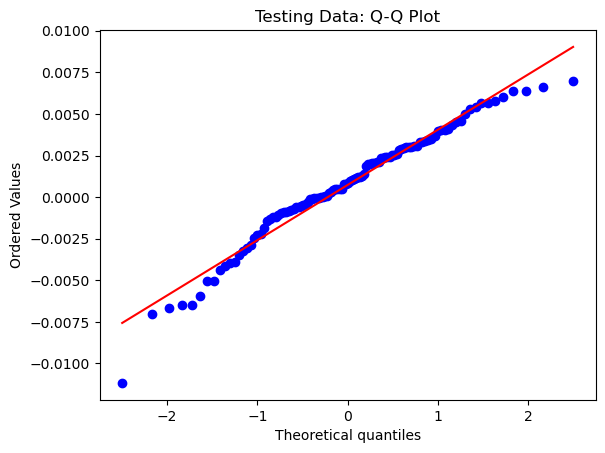

In [131]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()